# SEP Fluence Spectra Tool
This tool determines an integrated energy spectrum based on a custom integration-time interval. 

An optional pre-event background subtraction is possible.

In [ ]:
import os
import datetime as dt
from fluence import Event
import fluence.widgets as w

# Select spacecraft, instrument and time intervals

In [ ]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', index=1, options=('PSP', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'),…

Dropdown(description='Sensor:', options=('EPT', 'HET'), value='EPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

In [ ]:
# define period for data loading; the format is (year, month, day, hour, minute, second), with hour, minute, and second optional
startdate = dt.datetime(2021, 10, 28)
enddate = dt.datetime(2021, 11, 2)

# define background interval
subtract_background = True
background_start = dt.datetime(2021, 10, 28, 2, 0)
background_end = dt.datetime(2021, 10, 28, 14, 0)   

# spectral integration interval:
integration_start = dt.datetime(2021, 10, 28, 16, 0)
integration_end = dt.datetime(2021, 11, 1)

resample = '30min'  # '60s'

In [ ]:
# set your local path where you want to save the data files:
data_path = f"{os.getcwd()}/data/"

### Load the data


In [ ]:
E = Event()
E.load_data(w.spacecraft_drop.value, w.sensor_drop.value, w.species_drop.value, startdate, enddate, w.view_drop.value, resample, data_path)

### Plot intensity-time series to tune the chosen time intervals

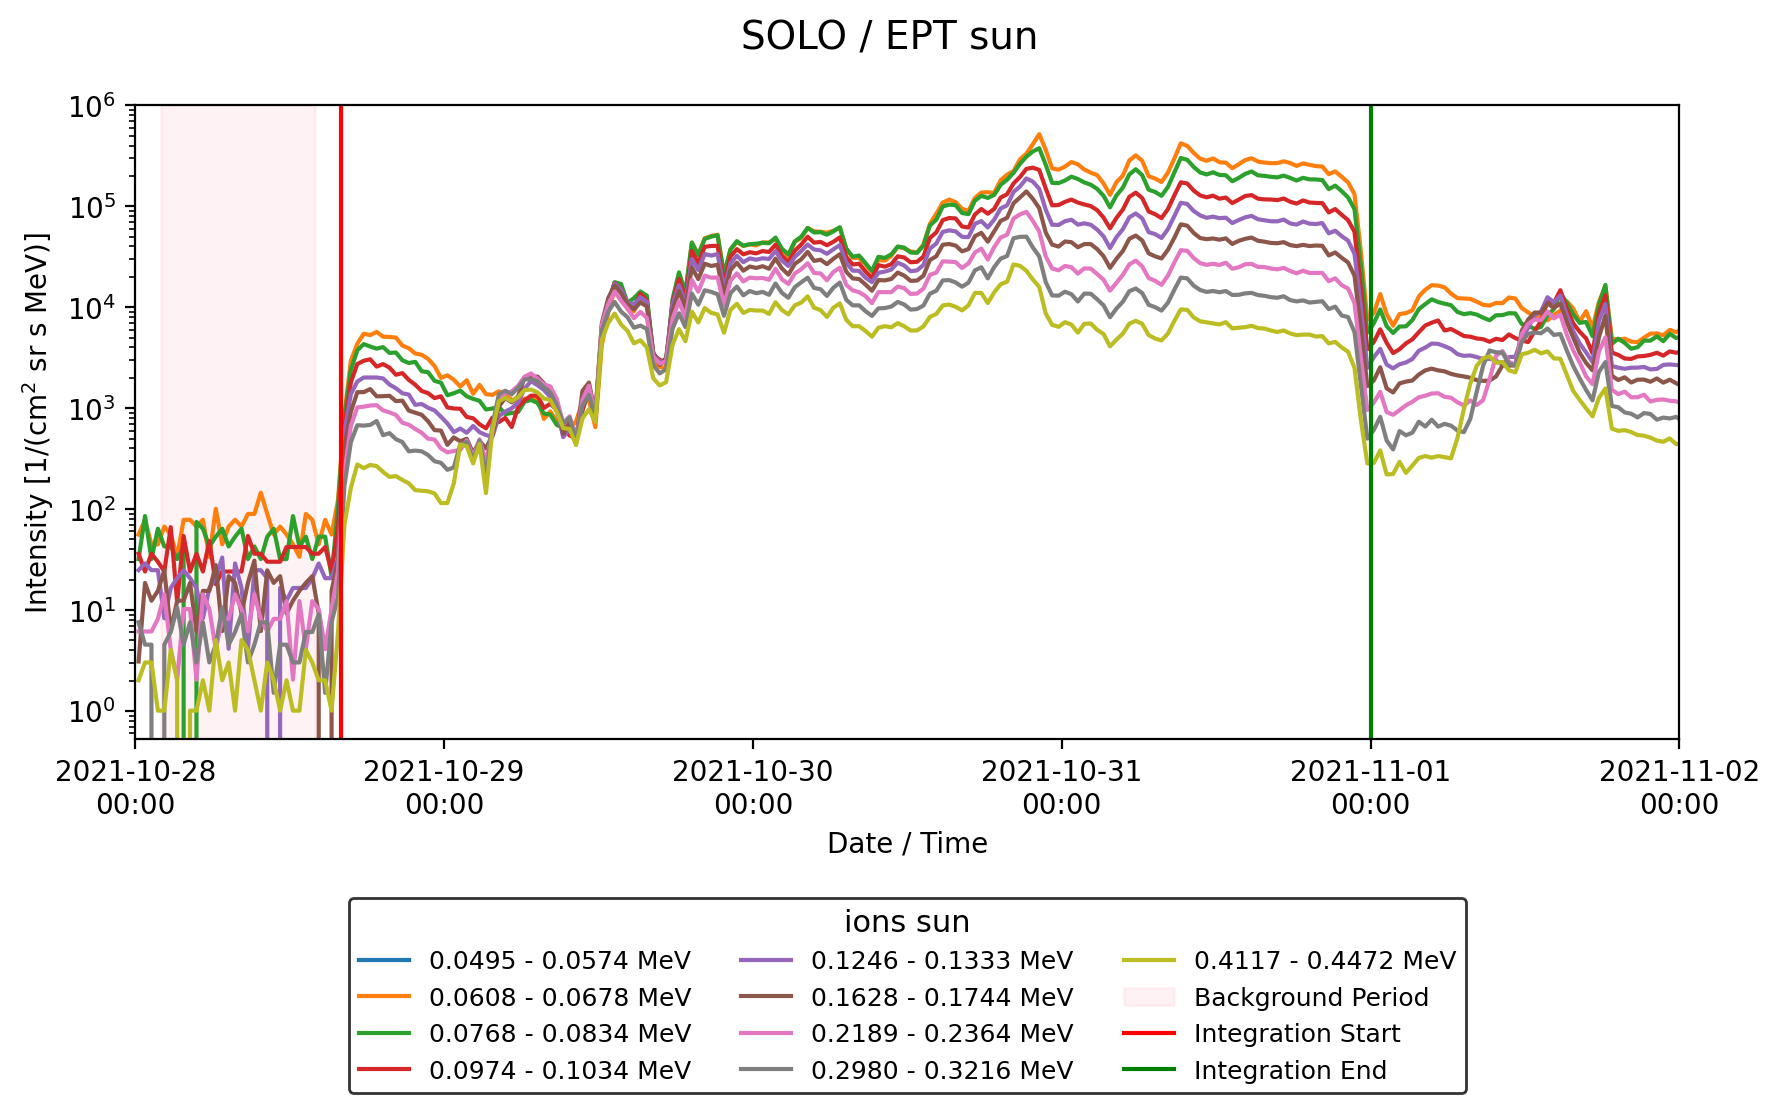

In [ ]:
fig, ax = E.plot_flux(integration_start, integration_end, subtract_background=subtract_background, 
                      background_start=background_start, background_end=background_end, savefig=False)

### Determine and plot spectrum

/Users/jagies/uni/soler/sep_tools/fluence/__init__.py:275: RuntimeWarning: Mean of empty slice
  I_spec = np.nanmean(df_fluxes.iloc[ind], axis=0)


subtracting background


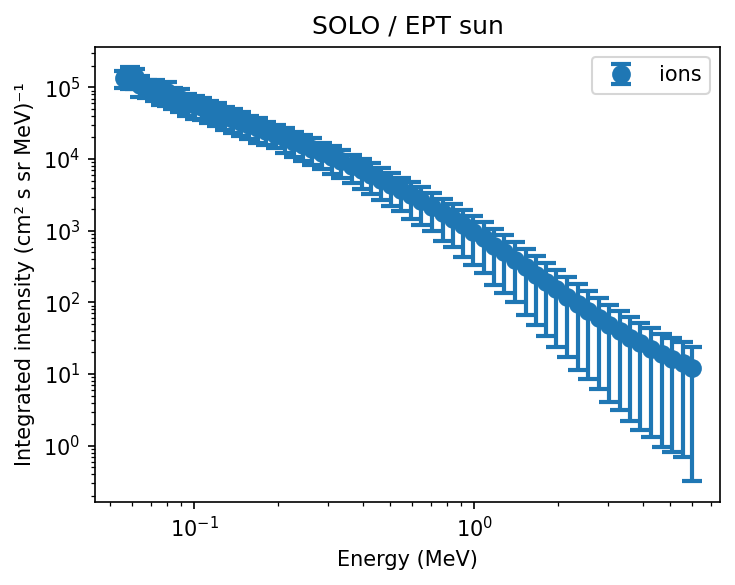

In [ ]:
E.get_integrated_spec(integration_start, integration_end, subtract_background=subtract_background,
                      background_start=background_start, background_end=background_end)

fig, ax = E.plot_spectrum(savefig=False)